# Dimensionality Reduction Using PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sn
%matplotlib inline

We make a set of clustered features and want to see if PCA can identify the clusters without knowing the labels

## Supervised Learning PCA: Wisconsin Breast Cancer Dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breastCancerData = load_breast_cancer()

In [4]:
breastCancerData.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(breastCancerData['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
df = pd.DataFrame(breastCancerData['data'],columns = breastCancerData['feature_names'])

In [7]:
targetNames = breastCancerData['target_names']

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We cannot plot the features as visuallising a 30 dimensional space is quite hard !

## Standardising the Data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df)

StandardScaler()

In [12]:
df_scaled = scaler.transform(df)

# PCA Analysis


In [13]:
from sklearn.decomposition import PCA

In [14]:
# We decide to use just 2 components 
numComponents = 2
pcaModel = PCA(n_components=numComponents)
pcaModel.fit(df_scaled)
df_scaled_pca = pcaModel.transform(df_scaled)
df_scaled_pca.shape

(569, 2)

Text(0, 0.5, '2nd Principal Component')

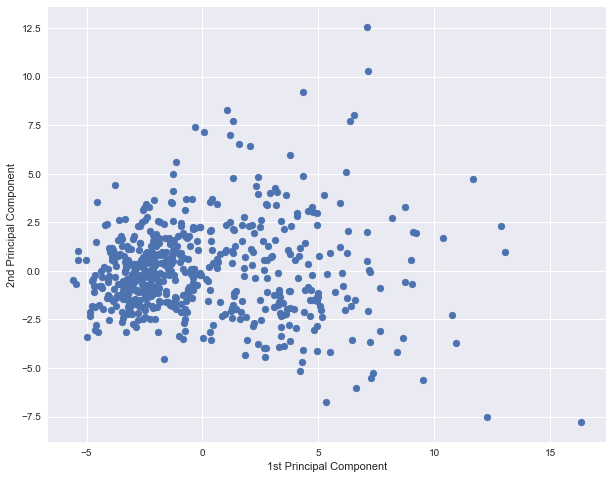

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(df_scaled_pca[:,0],df_scaled_pca[:,1])
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")

We can show the different labels - remember the PCA analysis has NO information about the labels

Text(0, 0.5, '2nd Principal Component')

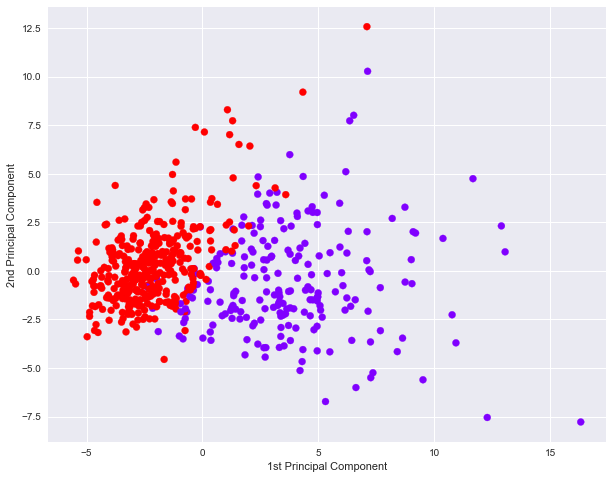

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(df_scaled_pca[:,0],df_scaled_pca[:,1], c=breastCancerData['target'],cmap='rainbow')
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")

The points are almost exactly separable - this would make our classification algorithm work well

In [17]:
# We can get the PCA weights on each of the features 
df_components = pd.DataFrame(pcaModel.components_,columns=breastCancerData['feature_names'])

In [18]:
# We have two vectors, one for each component with the corresponding feature weight 
df_components.shape

(2, 30)

In [19]:
df_components

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<AxesSubplot:>

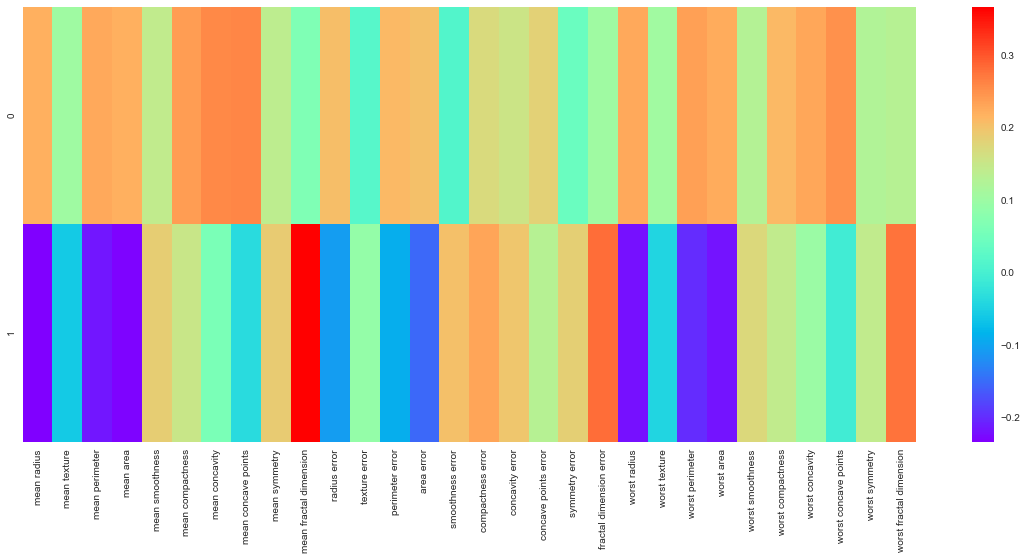

In [20]:
plt.figure(figsize=(20,8))
sn.heatmap(df_components,cmap='rainbow')

Use this to do SVM ?

# SVM Classifier Using N=6 PCA Results

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import HelpfulFunctions as hp

In [22]:
y = breastCancerData['target']

numComponents = 6
print("Num Components:",numComponents)
pcaModel = PCA(n_components=numComponents)
pcaModel.fit(df_scaled)
df_scaled_pca = pcaModel.transform(df_scaled)
X = df_scaled_pca
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 101)
model = SVC(probability = True)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))


Num Components: 6
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



# SVM Classifier Using All 30 Features

In [23]:
X = df_scaled

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

In [25]:
model.fit(X_train,y_train)

SVC(probability=True)

In [26]:
predictions = model.predict(X_test)

In [29]:
cm = confusion_matrix(y_test,predictions)
print(cm)

[[ 63   3]
 [  1 104]]


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.97      0.99      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

